<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/DecisionTree/Diabetes_Predictions_Using_Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from sklearn.datasets import load_diabetes

In [99]:
dataset = load_diabetes()

In [100]:
import pandas as pd
import numpy as np

In [101]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [102]:
# segragating dependent and independent features
x = df
y = dataset['target']

In [103]:
y = dataset['target']
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [105]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

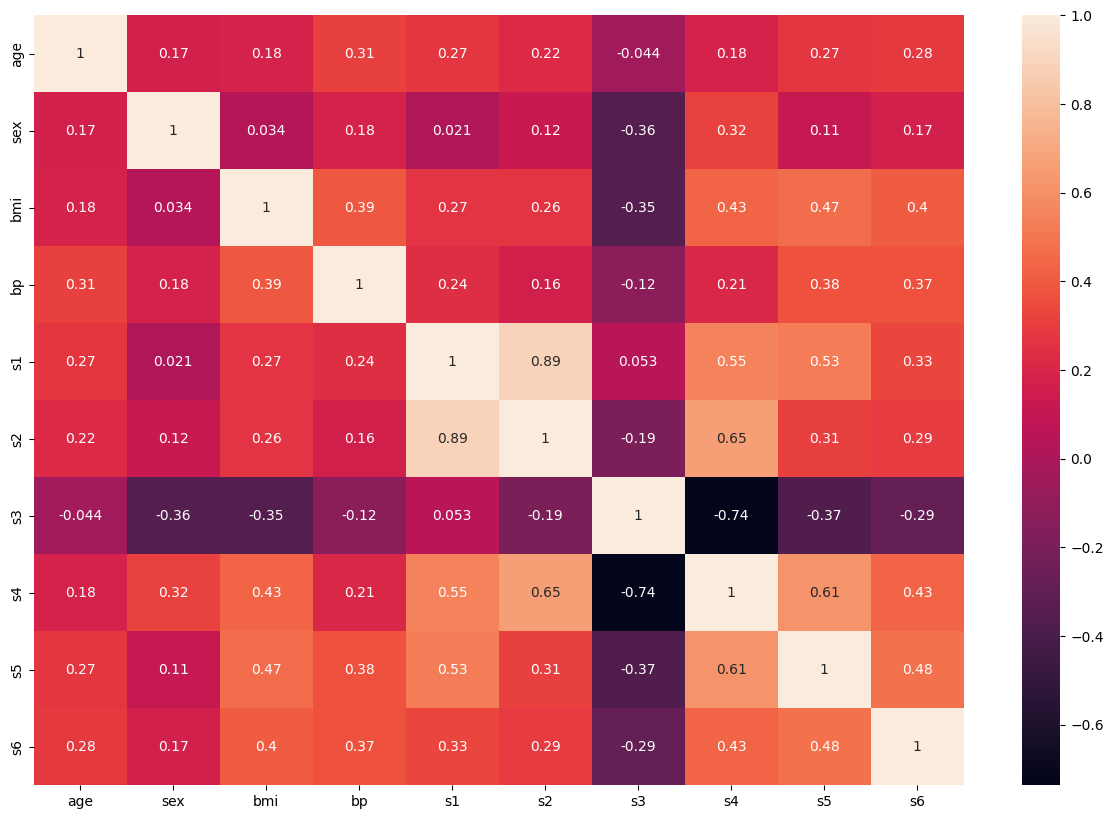

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(x_train.corr(), annot=True)

In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [108]:
param = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features' : ['sqrt', 'log2']
}

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
gridSearchCV = GridSearchCV(regressor, param_grid=param, cv=5, scoring='neg_mean_squared_error')

In [111]:
gridSearchCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [112]:
gridSearchCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [113]:
selectedModel = DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features= 'log2', splitter= 'best')

In [114]:
selectedModel.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='log2')

In [123]:
y_pred = selectedModel.predict(x_test)

In [124]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.3149416262894089
3629.5432205107077
48.2597455697244


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.005\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.5, 'x[7] <= 0.031\nfriedman_mse = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'friedman_mse = 2746.978\nsamples = 164\nvalue = 105.299'),
 Text(0.375, 0.16666666666666666, 'friedman_mse = 4018.783\nsamples = 45\nvalue = 164.489'),
 Text(0.75, 0.5, 'x[9] <= 0.034\nfriedman_mse = 5119.262\nsamples = 144\nvalue = 205.542'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'friedman_mse = 4724.172\nsamples = 94\nvalue = 185.617'),
 Text(0.875, 0.16666666666666666, 'friedman_mse = 3712.56\nsamples = 50\nvalue = 243.0')]

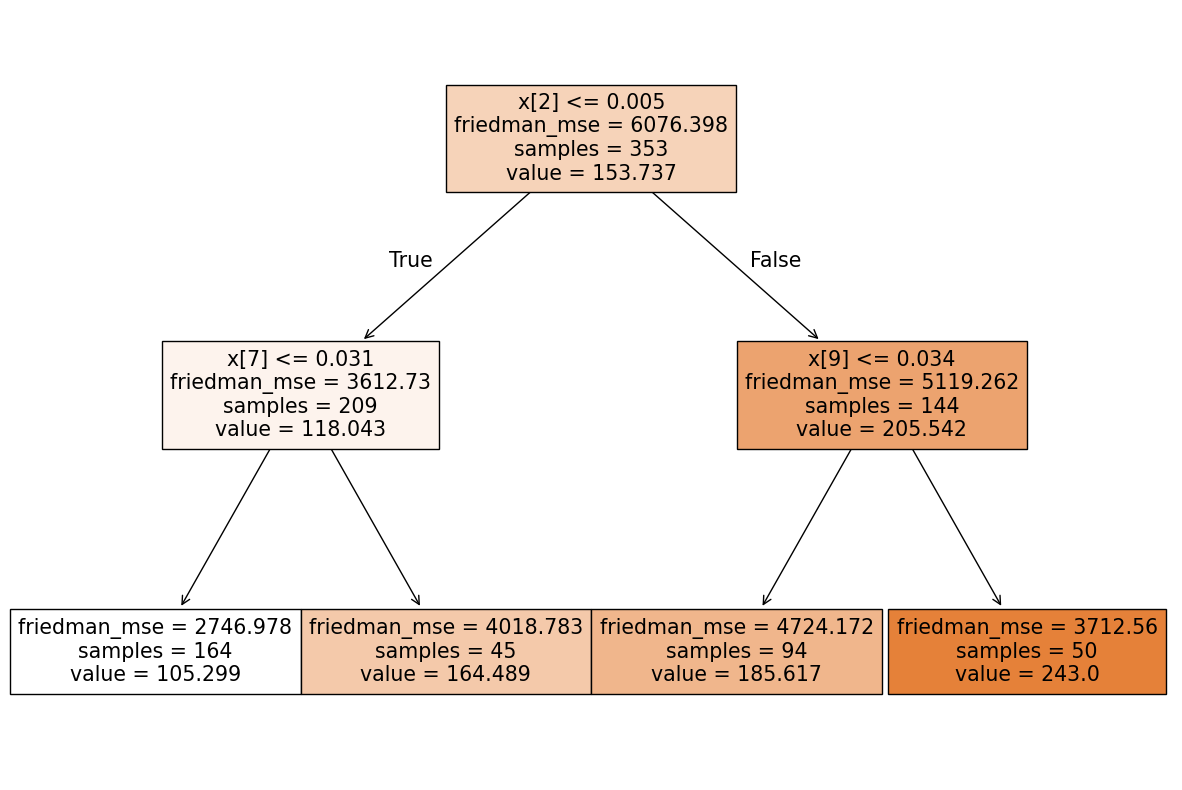

In [125]:
# visualise the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15, 10))

tree.plot_tree(selectedModel, filled=True)